# Model Development & Evaluation

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from lightgbm.sklearn import LGBMRegressor


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

In [2]:
df = pd.read_csv('preprocessed_data_LA.csv', usecols = ['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM','PM2.5'])
df.columns = ['avg_temp', 'max_temp', 'min_temp', 'sealevel_pressure', 'avg_humidity', 'rainfall_snowmelt', 'visibility', 'avg_windspeed', 'max_windspeed', 'PM2.5']
print (df.shape)
df.head()

(1876, 10)


,avg_temp,max_temp,min_temp,sealevel_pressure,avg_humidity,rainfall_snowmelt,visibility,avg_windspeed,max_windspeed,PM2.5
0,14.75,20.85,9.2,1023.95,45.0,0.0,16.10,4.20,16.75,18.644444
1,13.70,19.00,10.0,1013.95,70.0,0.0,12.65,4.50,12.95,26.358824
2,14.80,20.15,9.9,1017.85,69.0,0.0,16.10,4.90,18.60,10.700000
3,13.05,16.40,9.5,1013.30,54.5,0.0,16.10,12.50,24.15,4.788889
4,17.15,21.40,12.2,1012.20,48.5,0.0,16.10,11.75,33.25,8.733333


## Split Input and Traget Variables

In [3]:
X = df.drop('PM2.5', axis = 1)
y = df['PM2.5']
X.columns

Index(['avg_temp', 'max_temp', 'min_temp', 'sealevel_pressure', 'avg_humidity',
       'rainfall_snowmelt', 'visibility', 'avg_windspeed', 'max_windspeed'],
      dtype='object')

## Train Test Split

In [4]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (1876, 10)
Shape of training dataset: (1313, 9)
Shape of testing dataset: (563, 9)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Selection

In [6]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = reg.fit(X_train, X_test, y_train, y_test)
model

C:\Users\sumai\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 98%|█████████▊| 42/43 [00:04<00:00, 11.61it/s]

[23:34:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 43/43 [00:05<00:00,  8.57it/s]


,R-Squared,RMSE,Time Taken
Model,,,
LGBMRegressor,0.60,3.22,0.17
GradientBoostingRegressor,0.59,3.25,0.22
XGBRegressor,0.59,3.25,0.08
HistGradientBoostingRegressor,0.58,3.29,1.08
RandomForestRegressor,0.58,3.30,0.58
ExtraTreesRegressor,0.56,3.36,0.37
BaggingRegressor,0.54,3.45,0.07
NuSVR,0.54,3.45,0.11
SVR,0.54,3.47,0.10


### Model Building: LightGBM Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from pprint import pprint

rf = base_model = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [8]:
### We've tried the following range of hyperparameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

### Random Hyperparameter Grid

In [9]:
import numpy as np
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [500]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [30]
# Minimum number of samples required to split a node
min_samples_split = [5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [30],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [5],
 'n_estimators': [500]}


### Random Search Training

In [10]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

#### How much time it may take?

In [11]:
def timer(start_time = None):
    
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

### Fit the model

In [12]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
rf_random.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished



 Time taken: 0 hours 0 minutes and 6.65 seconds.


In [13]:
pprint (rf_random.best_params_)
print ('Negative mean squared error is:', rf_random.best_score_)

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}
Negative mean squared error is: -12.718204482676322


In [14]:
best_parameters = rf_random.best_params_
best_parameters

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

# Model Evaluation

In [15]:
## Tuned Model

best_random = RandomForestRegressor(random_state = 42, n_estimators = 500, min_samples_split = 5, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 15, bootstrap = True)
best_random.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, random_state=42)

##### Let's look at the important performace metrics--

### Base Model

In [16]:
base_model.fit(X_train, y_train)
y_hat_base = base_model.predict(X_test)

from sklearn import metrics

rsquared = metrics.r2_score(y_test, y_hat_base)
adjusted_r_squared = 1 - (1-rsquared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Mean absolute error: {}'.format(metrics.mean_absolute_error(y_test, y_hat_base)))
print('Mean squared error: {}'.format(metrics.mean_squared_error(y_test, y_hat_base)))
print('Root mean squared error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_hat_base))))
print('R Squared value: {}'.format(rsquared))
print('Adjusted R Squared Value: {}'.format(adjusted_r_squared))

y_pred = rf.predict(X_test)

Mean absolute error: 2.396306808497251
Mean squared error: 10.879892852112649
Root mean squared error: 3.298468258466746
R Squared value: 0.5803191533163606
Adjusted R Squared Value: 0.5734889044553249


### Tuned Model

In [17]:
y_hat = best_random.predict(X_test)

rsquared = metrics.r2_score(y_test, y_hat)
adjusted_r_squared = 1 - (1-rsquared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Mean absolute error: {}'.format(metrics.mean_absolute_error(y_test, y_hat)))
print('Mean squared error: {}'.format(metrics.mean_squared_error(y_test, y_hat)))
print('Root mean squared error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_hat))))
print('R Squared value: {}'.format(rsquared))
print('Adjusted R Squared Value: {}'.format(adjusted_r_squared))

Mean absolute error: 2.3646124124136727
Mean squared error: 10.379074950422831
Root mean squared error: 3.221657174564487
R Squared value: 0.5996376966028134
Adjusted R Squared Value: 0.5931218544137091


### Feature Importance

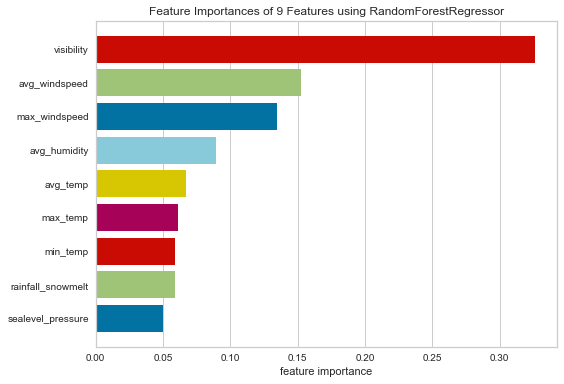

In [18]:
from yellowbrick.model_selection import FeatureImportances

# Title case the feature for better display and create the visualizer
labels = df.columns.to_list()
viz = FeatureImportances(best_random, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

#### The error terms are small and the model can moderately explain variability.

##### Should we look at the distribution plot of the actual and predicted values of the target variable?

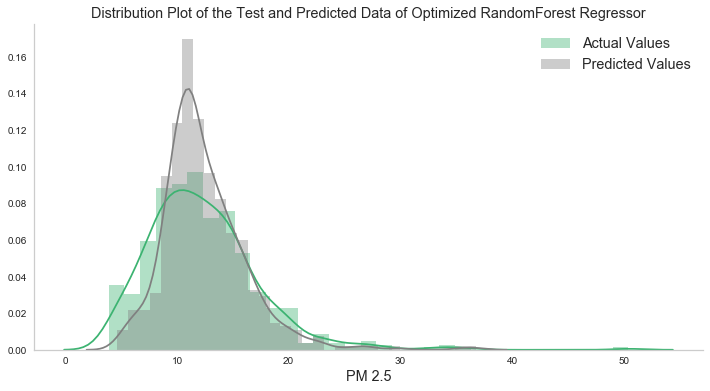

In [19]:
def DistributionPlot(test, predicted, testName, predName, model):
    width = 12
    height = 6
    plt.figure(figsize= (width, height))

    ax1 = sns.distplot(test, hist = True, color = "mediumseagreen", label = testName)
    ax2 = sns.distplot(predicted, hist = True, color = "gray", label = predName, ax = ax1)

    plt.title('Distribution Plot of the Test and Predicted Data of {}'.format(model), fontsize= 'large')
    plt.xlabel('PM 2.5', fontsize= 'large')
    #plt.ylabel('Fequency')
    plt.legend(fontsize= 'large')
    plt.grid(None)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

DistributionPlot(y_test, y_hat, "Actual Values", "Predicted Values", 'Optimized RandomForest Regressor')

#### What the residuals look like?

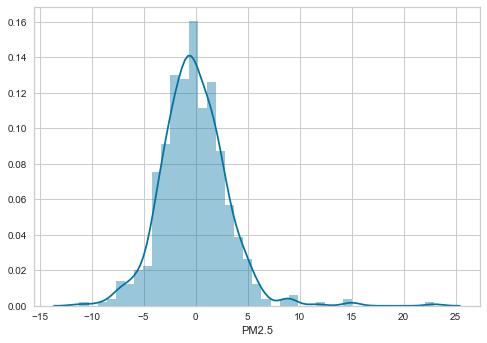

In [20]:
sns.distplot(y_test - y_hat)

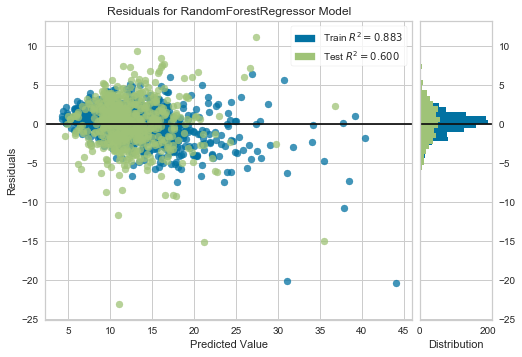

In [21]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(best_random, qqplot = True, hist = True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### Not too bad! The dots are pretty close except for some.

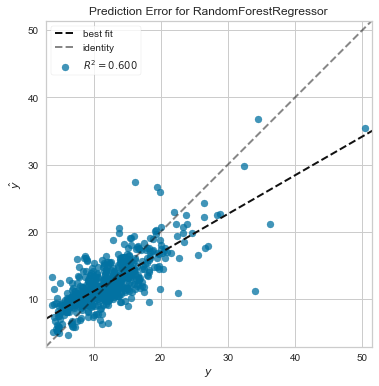

In [22]:
from yellowbrick.regressor import prediction_error

width = 6
height = 6
plt.figure(figsize= (width, height))

# Instantiate the linear model and visualizer
visualizer = prediction_error(best_random, X_train, y_train, X_test, y_test)

### Let's fit the whole data now Predict result from user input.

In [23]:
best_random.fit(X, y)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, random_state=42)

In [24]:
import pickle 
# open a file, where you ant to store the data
file = open('rf_PM25.pkl', 'wb')

# dump information to that file
pickle.dump(best_random, file)